<a id="home">Dalam studi kasus ini, anda akan mengimplementasi regresi linier dan melihatnya bekerja pada data. Studi kasus kali ini terdiri dari 2 bagian, yaitu:</a>

1. [Part I: Operasi Matriks](#operasi-matriks)
2. [Part II: Linear regression with one variable](#one-variable)
3. [Part III: Normal Equation](#normal-equation)

# <a id="operasi-matriks">Part I: Operasi Matriks</a> (Back to [Home](#home))

Diketahui matriks `A` dan vektor `b` sebagai berikut:

In [6]:
import numpy as np

A = np.array([[1,2], [1,3], [1,4]])

In [7]:
A.shape

(3, 2)

In [8]:
b = np.array([[1],[2],[3]])

In [9]:
b.shape

(3, 1)

Kita operasikan `A` dan `b` dengan operasi `*` sbb:

In [12]:
A * b

array([[ 1,  2],
       [ 2,  6],
       [ 3, 12]])

In [13]:
np.dot(A,b)

ValueError: shapes (3,2) and (3,1) not aligned: 2 (dim 1) != 3 (dim 0)

In [14]:
np.dot(b.T,A)

array([[ 6, 20]])

In [15]:
b.T @ A

array([[ 6, 20]])

## Pertanyaan Refleksi
1. Apakah yang terjadi apabila `A * b`? Coba ceritakan.
2. Apakah yang terjadi apabila `np.dot(A,b)`? Coba ceritakan.
3. Apakah yang terjadi apabila `np.dot(b.T,A)`? Coba ceritakan.    
4. Apakah yang terjadi apabila `b.T @ A`? Coba ceritakan.

**Petunjuk**: `b.T` adalah transpose dari vektor `b`.   


Jawab :

1. Apabila `A * b` yang terjadi adalah akan terjadi error karena
dimensi matriks A dan vektor b tidak kompatibel untuk operasi
perkalian matriks. Matriks A memiliki dimensi (3, 2) dan vektor
b memiliki dimensi (3, 1). Namun, Pada kenyataannya, A * b
dapat dijalankan dalam Python dan menghasilkan matriks dengan
dimensi (3, 2). Hal ini terjadi karena Python melakukan
operasi perkalian elemen-demi-elemen
(element-wise multiplication) ketika dua array dengan
dimensi yang tidak kompatibel dikalikan.

2. Ketika `np.dot(A,b)` dijalankan akan error ValueError
ketika menjalankan `np.dot(A, b)` karena dimensi matriks
A dan vektor b tidak sesuai untuk melakukan perkalian
matriks secara langsung.

3. `np.dot(b.T, A)` menghasilkan array dengan dimensi (1, 3)
yang berisi hasil perkalian dot (inner product) antara
vektor b (setelah ditranspose) dengan setiap kolom matriks A

4. `Ketika b.T @ A` dijalankan sama dengan `np.dot(b.T, A)`. Hasilnya akan menghasilkan matriks dengan dimensi (1, 3).


Misalkan kita membuat vektor `c` sbb:

In [19]:
c_awal = np.array([1,2,3])
c_awal.shape

(3,)

In [21]:
c_akhir = c_awal[:, np.newaxis]
c_akhir.shape

(3, 1)

## Pertanyaan Refleksi
1. Berapakah dimensi dari `c_awal`?
2. Berapakah dimensi dari `c_akhir`?

Jawab:

1. Dimensi `c_awal` adalah `(3,)`, yang berarti
array memiliki 1 baris dan 3 kolom.
2. Dimensi `c_akhir` adalah (3, 1), yang berarti
array memiliki 3 baris dan 1 kolom.

# <a id="one-variable">Part II :Linear regression with one variable</a> (Back to [Home](#home))

![](images/food-truck.jpg)

Pada bagian latihan ini, anda akan menerapkan regresi linier dengan satu variabel untuk memprediksi keuntungan truk makanan. Misalkan anda adalah CEO dari waralaba restoran dan sedang mempertimbangkan berbagai kota untuk membuka gerai baru. Waralaba ini sudah memiliki truk di berbagai kota dan anda memiliki data untuk keuntungan dan populasi dari kota-kota tersebut.

Anda ingin menggunakan data ini untuk membantu anda memilih kota mana yang akan menjadi tujuan ekspansi bisnis berikutnya.   
File `ex1data1.txt` berisi kumpulan data untuk masalah regresi linier kita.     
- Kolom pertama adalah **jumlah penduduk suatu kota** dan
- kolom kedua adalah **keuntungan dari truk makanan di kota tersebut**.    

_Nilai negatif untuk keuntungan menunjukkan kerugian_.

Kita import _library-library_ yang dibutuhkan.

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import axes3d, Axes3D

## Plot the Data
Mari kita plot datanya terlebih dulu ya.

In [134]:
def plot_data(x, y):
    plt.scatter(x, y, marker="x", c="red", label="Data Training")
    plt.xlabel("Populasi")
    plt.ylabel("Keuntungan")
    plt.legend()
    plt.show()

Plotting Data...


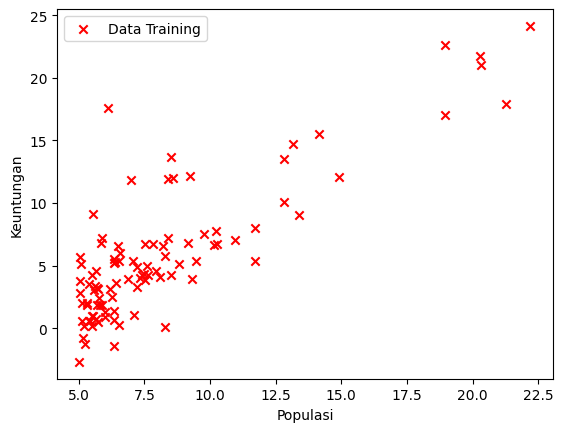

In [135]:
print('Plotting Data...')
data = np.loadtxt('ex1data1.txt', delimiter=',', usecols=(0, 1))
X = data[:, 0]
y = data[:, 1]
m = y.size

plt.ion()
plt.figure(0)
plot_data(X, y)


## Gradient Descent

Seperti yang sudah dijelaskan di kelas, MSE _cost function_ untuk model regresi linier adalah

$$
    \text{MSE}(\mathbf{X}, h_\mathbf{\theta}) = \frac{1}{2m} \sum_{i=1}^{m}{(\mathbf{\theta}^\intercal \mathbf{x}^{(i)} - y^{(i)})^2}
$$

dengan   
$m$      = jumlah training data    
$\mathbf{\theta}$ = parameter model regresi linier    
$\mathbf{x}^{(i)}$ = training data ke-$i$     
$y^{(i)}$ = label data ke-$i$     
$\mathbf{X}$ = matriks desain    
$h_{\theta}$ = hipotesis.

### Pertanyaan Refleksi
1. Apakah $\mathbf{x}^{(i)}$ merupakan vektor? Jika vektor, berapakah dimensi vektor tersebut?
2. Apakah $y^{(i)}$ merupakan vektor? Jika vektor, berapakah dimensi vektor tersebut?
3. Berapakah dimensi dari matriks desain, $\mathbf{X}$?
4. Apakah $\theta$ merupakan vektor? Jika vektor, berapakah dimensi vektor tersebut?
5. Apakah isi dari $h_{\theta}$ dalam kasus ini?

Jawab :

1. Ya, `x` merupakan vektor.Dimensi vektor x adalah `(m, 1)`, di mana m adalah jumlah data training

2. Ya, `y(i)` merupakan vektor. Dimensi vektor y(i) adalah `(1,)` (vektor baris dengan satu elemen).

3. Dimensi matriks desain `X` adalah `(m, n)`, di mana:
`m` adalah jumlah data training.
`n` adalah jumlah fitur (dalam kasus ini, `n = 1` karena hanya ada satu fitur, yaitu populasi).

4. Ya, $\theta$ merupakan vektor. Dimensi vektor theta adalah `(n, 1)`, di mana `n` adalah jumlah fitur.

5. Dimensi vektor `h` adalah `(m, 1)`.
Setiap elemen `h_i` dalam vektor h dihitung dengan rumus `h_i = theta_0 + theta_1 * x_i`, di mana: `h_i` adalah prediksi model untuk data ke-i. `theta_0 `adalah intercept. `theta_1` adalah `slope.x_i` adalah nilai populasi untuk data ke-i.

In [136]:
def compute_cost(X, y, theta):
    # Initialize some useful values
    m = y.size
    cost = 0

    # Hitung hipotesis
    h = np.dot(X, theta)

    # Hitung selisih dan kuadratkan
    error = h - y
    squared_error = error ** 2

    # Hitung cost (MSE)
    cost = (1 / (2 * m)) * np.sum(squared_error)

    return cost

Kita sudah belajar bahwa dalam algoritma batch gradient descent, setiap iterasi melakukan proses update sebagai berikut:

$$
    \theta_j = \theta_j - \eta \frac{1}{m} \sum_{i=1}^m{(\mathbf{\theta}^\intercal \mathbf{x}^{(i)}-y^{(i)})x_j^{(i)}
   }
$$
Selanjutnya, dalam bentuk matriks
$$
    \theta = \theta - \frac{\alpha}{m} \times \texttt{np.sum}(\mathbf{X} * \texttt{error})
$$
dengan
$$
    \texttt{error} = \texttt{np.dot(X, theta).flatten() - y}
$$


In [137]:
def gradient_descent(X, y, theta, eta, num_iters):
    # Inisialisasi beberapa variabel
    m = y.size
    MSE_history = np.zeros(num_iters)

    for i in range(0, num_iters):

        # Hitunglah error
        error = np.dot(X, theta).flatten() - y

        # Hitunglah theta
        theta = theta - (eta / m) * np.sum(X * error[:, np.newaxis], axis=0)

        # Hitunglah cost dengan memanggil compute_cost dengan theta yang
        # sudah dihitung Simpan hasil perhitungan cost ke dalam J_history[i]
        MSE_history[i] = compute_cost(X, y, theta)

    return theta, MSE_history

Running Gradient Descent...
Initial cost : 32.072733877455676 (This value should be about 32.07)
Theta found by gradient descent: [-3.63029144  1.16636235]


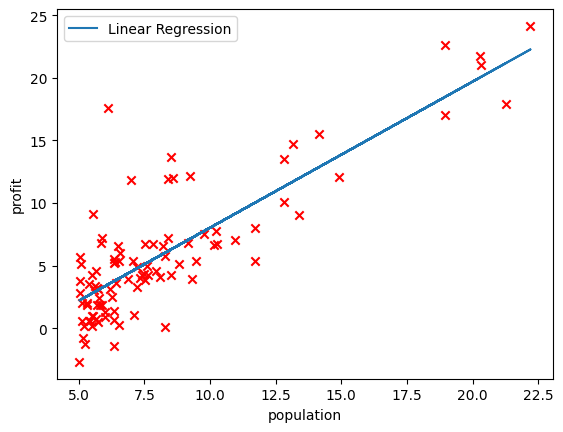

In [138]:
print('Running Gradient Descent...')

X = np.c_[np.ones(m), X]  # Add a column of ones to X
theta = np.zeros(2)  # initialize fitting parameters

# Some gradient descent settings
iterations = 1500
eta = 0.01

# Compute and display initial cost
print('Initial cost : ' + str(compute_cost(X, y, theta)) + ' (This value should be about 32.07)')

theta, MSE_history = gradient_descent(X, y, theta, eta, iterations)

print('Theta found by gradient descent: ' + str(theta.reshape(2)))

# Plot the linear fit
plt.figure(0)
line1, = plt.plot(X[:, 1], np.dot(X, theta), label='Linear Regression')
plt.scatter(data[:, 0], data[:, 1], c='r', marker="x")
plt.xlabel('population')
plt.ylabel('profit')

plt.legend(handles=[line1])

In [139]:
# Memprediksi profit untuk jumlah populasi 35,000 dan 70,000
# Supaya bilangannya tidak terlalu besar, kita gunakan puluh ribuan, jadi 35,000 menjadi 3.5
predict1 = np.dot(np.array([1, 3.5]), theta)
print('For population = 35,000, we predict a profit of {:0.3f} (This value should be about 4519.77)'.format(
    predict1*10000))
predict2 = np.dot(np.array([1, 7]), theta)
print('For population = 70,000, we predict a profit of {:0.3f} (This value should be about 45342.45)'.format(
    predict2*10000))

For population = 35,000, we predict a profit of 4519.768 (This value should be about 4519.77)
For population = 70,000, we predict a profit of 45342.450 (This value should be about 45342.45)


Visualizing MSE(theta0, theta1) ...


Text(0, 0.5, '$\\theta_1$')

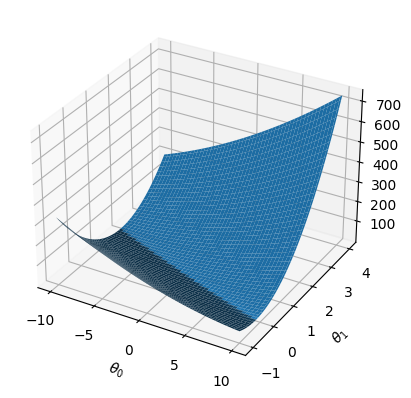

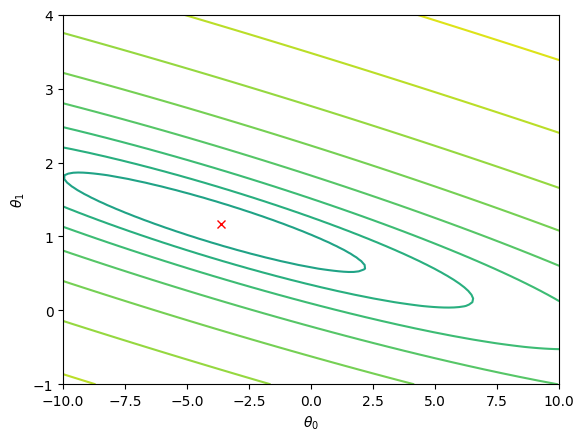

In [140]:
print('Visualizing MSE(theta0, theta1) ...')

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

xs, ys = np.meshgrid(theta0_vals, theta1_vals)
MSE_vals = np.zeros(xs.shape)

# Fill out MSE_vals
for i in range(0, theta0_vals.size):
    for j in range(0, theta1_vals.size):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        MSE_vals[i][j] = compute_cost(X, y, t)

MSE_vals = np.transpose(MSE_vals)

fig1 = plt.figure(1)
ax = fig1.add_subplot(projection='3d')
ax.plot_surface(xs, ys, MSE_vals)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

plt.figure(2)
lvls = np.logspace(-2, 3, 20)
plt.contour(xs, ys, MSE_vals, levels=lvls, norm=LogNorm())
plt.plot(theta[0], theta[1], c='r', marker="x")
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

## Pertanyaan Refleksi
1. Di manakah kira-kira nilai $\theta_0$ dan $\theta_1$ di contour?
2. Apakah yang dapat anda simpulkan mengenai posisi $\theta_0$ dan $\theta_1$ di contour tersebut?

Jawab :

1. $\theta_0$ Dari gambar, terlihat bahwa nilai $\theta_0$ yang meminimalkan MSE (Mean Squared Error) berada di sekitar -2.5. Hal ini dapat dilihat dari kontur yang berwarna biru tua (nilai MSE terendah) yang terkonsentrasi di sekitar nilai $\theta_0$ tersebut. Lalu sedangkan $\theta_1$ nilai optimalnya berada di sekitar 4. Sama seperti $\theta_0$, kontur biru tua terkonsentrasi di sekitar nilai $\theta_1$ tersebut.

2. Dengan melihat kontur, dapat disimpulkan bahwa nilai $\theta_0$ dan $\theta_1$ yang optimal untuk meminimalkan MSE berada di sekitar (-2.5, 4), dengan kemungkinan variasi di sekitar nilai tersebut.


# <a id="normal-equation">Part III: Normal Equation</a> (Back to [Home](#home))

Dalam part III, kita akan menggunakan _Normal Equation_, yaitu:
$$
    \hat{\theta} = (\mathbf{X}^\intercal \mathbf{X})^{-1} \mathbf{X}^\intercal \mathbf{y}
$$
dengan
- $\hat{\theta}$ adalah nilai $\theta$ yang meminimumkan MSE cost function.
- $\mathbf{y}$ adalah vektor yang berisi nilai target dari $y^{(1)}$ sampai dengan $y^{(m)}$.

untuk memprediksi harga rumah.    
Misalkan anda menjual rumah anda dan anda ingin tahu berapa harga pasar yang bagus.    
Salah satu cara untuk melakukan ini adalah dengan terlebih dahulu mengumpulkan informasi tentang rumah yang dijual baru-baru ini dan membuat model harga rumah.    

File `ex1data2.txt` berisi harga rumah-rumah di Portland, Oregon.    
Kolom pertama adalah ukuran rumah (dalam square feet), kolom kedua adalah jumlah kamar tidur, dan kolom ketiga adalah harga rumah.

In [158]:
def normal_eqn(X, y):
    theta = np.zeros((X.shape[1], 1))
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

In [159]:
print('Solving with normal equations ...')

# Load data
data = np.loadtxt('ex1data2.txt', delimiter=',', dtype=np.int64)
X = data[:, 0:2]
y = data[:, 2]
m = y.size

# Add intercept term to X
X = np.c_[np.ones(m), X]

theta = normal_eqn(X, y)

# Display normal equation's result
print('Theta computed from the normal equations : \n{}'.format(theta))


# Estimate the price of a 1650 sq-ft, 3 br house
predict = np.array([1, 1650, 3])
price = np.dot(predict, theta)

Solving with normal equations ...
Theta computed from the normal equations : 
[89597.9095428    139.21067402 -8738.01911233]


In [160]:
print(f"Jadi harga prediksi rumah adalah ${round(price)}")

Jadi harga prediksi rumah adalah $293081


<center><h1>The End</h1></center>